In [1]:
import plotly.express as px
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
import panel as pn
from panel.interact import interact
import hvplot.pandas as hvplot
from dotenv import load_dotenv

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
F:\ProgramFiles\Anaconda\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
load_dotenv()
mapbox_api = os.getenv("mapbox_key")

In [3]:
#Building primary data frame for ZALL with Opportunity Ratio and saving it as zall_df.csv to ../data/clean_data
prop_value_df = pd.read_csv(Path("../data/clean_data/zillow_data_houston_sa_austin_dallas.csv"), header = 0, usecols = ["YEAR","AVG_PROP","ZIPCODE","CITY"], names = ["YEAR","REGION","AVG_PROP","ZIPCODE","CITY"], infer_datetime_format=True, parse_dates=True)[["YEAR","ZIPCODE","CITY","AVG_PROP"]]
prop_value_df["YEAR"] = pd.DatetimeIndex(prop_value_df["YEAR"]).year

avg_income_df = pd.read_csv(Path("../data/clean_data/avg_income.csv"), header = 0, names = ["YEAR","ZIPCODE","AVG_INCOME"], infer_datetime_format=True, parse_dates=True, dtype = {"avg_income" : np.float64})

lat_long_df = pd.read_excel(Path("../data/lat_long_by_zip_code.xlsx"), header = 0, usecols = ["Zip Code","Latitude","Longitude"])
lat_long_df = lat_long_df.rename(columns = {"Zip Code": "ZIPCODE", "Latitude": "LATITUDE" ,"Longitude": "LONGITUDE"})

zall_df = pd.merge(pd.merge(avg_income_df, prop_value_df, how = "inner", on = ["YEAR", "ZIPCODE"]), lat_long_df, how = "inner", on = "ZIPCODE")

zall_df["OPPORTUNITY_RATIO"] = zall_df["AVG_INCOME"].astype(float) / zall_df["AVG_PROP"].astype(float)
zall_df = zall_df.groupby(["YEAR", "CITY", "ZIPCODE"], as_index = True).mean()

zall_df.to_csv("../data/clean_data/zall_df.csv") 

zall_df.head()


AVG_INCOME       AVG_PROP  LATITUDE  LONGITUDE  \
YEAR CITY   ZIPCODE                                                     
2007 Austin 78613    68146.254591  214504.916667   30.5052   -97.8203   
            78617    32272.767075  151372.916667   30.1745   -97.6134   
            78634    50958.755839  167381.166667   30.5257   -97.5672   
            78653    45205.346985  184019.500000   30.3388   -97.5323   
            78660    53026.718649  181838.916667   30.4421   -97.6299   

                     OPPORTUNITY_RATIO  
YEAR CITY   ZIPCODE                     
2007 Austin 78613             0.317729  
            78617             0.213208  
            78634             0.304470  
            78653             0.245656  
            78660             0.291663

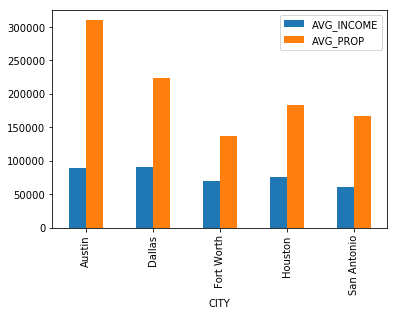

In [4]:
#Building All time AVG_INCOME VS AVG_PROP groupby CITY as all_time_IVP_city_df
all_time_IVP_city_df = zall_df.drop(["LATITUDE","LONGITUDE","OPPORTUNITY_RATIO"], axis=1)
all_time_IVP_city_df = all_time_IVP_city_df.groupby("CITY").mean()

all_time_IVP_city_df.plot.bar()


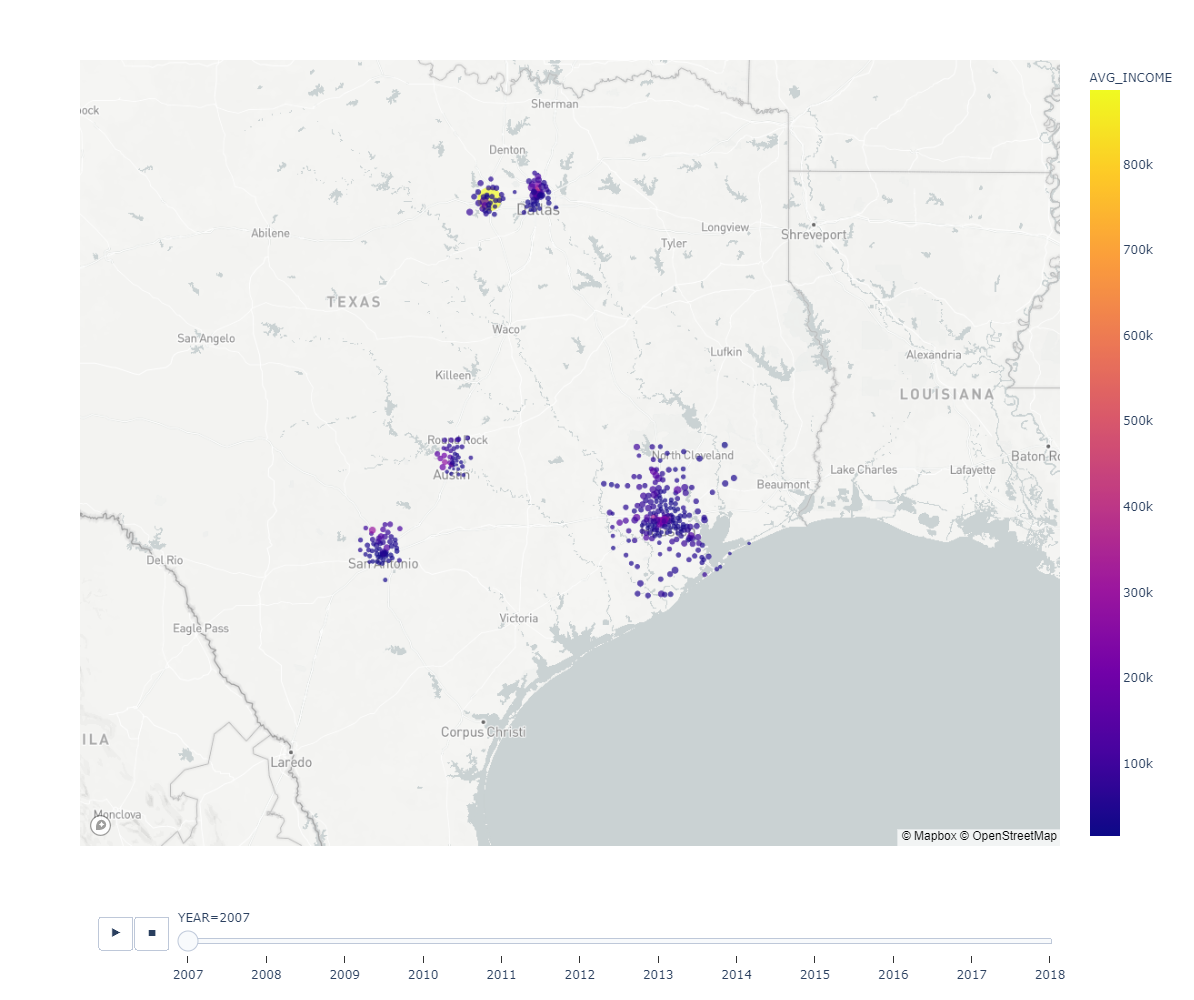

In [12]:
#Building Mapbox plot for Income and Property Value over year

zall_df = zall_df.reset_index()

x.set_mapbox_access_token(mapbox_api)

map_plot = px.scatter_mapbox(
    zall_df,
    lat="LATITUDE",
    lon="LONGITUDE",
    size="OPPORTUNITY_RATIO",
    color="AVG_INCOME",
    hover_name="ZIPCODE",
    animation_frame="YEAR",
    height = 1000,
    zoom=6
)

map_plot.show()


In [6]:
#Building All time AVG_INCOME VS AVG_PROP groupby CITY as all_time_IVP_city_df
time_series = zall_df.groupby(["CITY","YEAR"]).mean()

time_series_plot = time_series.hvplot.line(
                x="YEAR",
                y=["AVG_PROP", "AVG_INCOME"],
                groupby="CITY",
                title="TTS"
)

time_series_plot


:DynamicMap   [CITY]
   :NdOverlay   [Variable]
      :Curve   [YEAR]   (value)

In [7]:

zall_df=zall_df.reset_index()


In [8]:
#Building All time AVG_INCOME VS AVG_PROP groupby CITY as all_time_IVP_city_df
time_series = zall_df.groupby(["CITY","YEAR"]).mean()
time_series =time_series.reset_index()
time_series.head()
time_series_austin = time_series[time_series["CITY"] =="Austin"]

time_series_houston = time_series[time_series["CITY"] =="Houston"]

time_series_dallas = time_series[time_series["CITY"] =="Dallas"]

time_series_san_ant = time_series[time_series["CITY"] =="San Antonio"]

time_series_fw = time_series[time_series["CITY"] =="Fort Worth"]



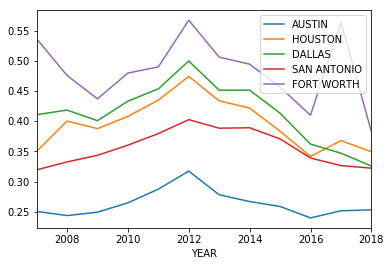

In [9]:
#Line plot showing opportunity ratio over time in sample cities

ax=time_series_austin.plot.line(x="YEAR", y="OPPORTUNITY_RATIO")
time_series_houston.plot(ax=ax, x="YEAR", y="OPPORTUNITY_RATIO")
time_series_dallas.plot(ax=ax, x="YEAR", y="OPPORTUNITY_RATIO")
time_series_san_ant.plot(ax=ax, x="YEAR", y="OPPORTUNITY_RATIO")
time_series_fw.plot(ax=ax, x="YEAR", y="OPPORTUNITY_RATIO")

ax.legend(["AUSTIN", "HOUSTON", "DALLAS", "SAN ANTONIO", "FORT WORTH"])



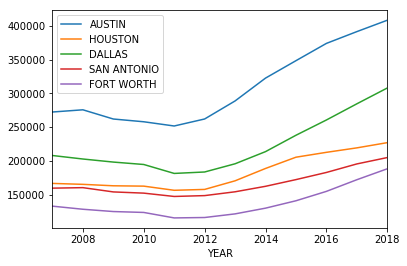

In [10]:
#Line plot showing property value over time in sample cities
ax=time_series_austin.plot.line(x="YEAR", y="AVG_PROP")
time_series_houston.plot(ax=ax, x="YEAR", y="AVG_PROP")
time_series_dallas.plot(ax=ax, x="YEAR", y="AVG_PROP")
time_series_san_ant.plot(ax=ax, x="YEAR", y="AVG_PROP")
time_series_fw.plot(ax=ax, x="YEAR", y="AVG_PROP")

ax.legend(["AUSTIN", "HOUSTON", "DALLAS", "SAN ANTONIO", "FORT WORTH"])

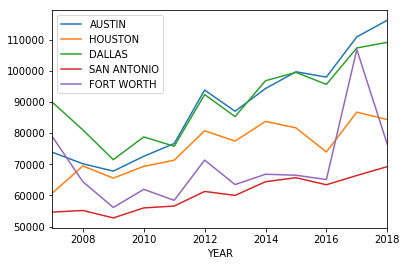

In [11]:
#Line plot showing income over time in sample cities
ax=time_series_austin.plot.line(x="YEAR", y="AVG_INCOME")
time_series_houston.plot(ax=ax, x="YEAR", y="AVG_INCOME")
time_series_dallas.plot(ax=ax, x="YEAR", y="AVG_INCOME")
time_series_san_ant.plot(ax=ax, x="YEAR", y="AVG_INCOME")
time_series_fw.plot(ax=ax, x="YEAR", y="AVG_INCOME")

ax.legend(["AUSTIN", "HOUSTON", "DALLAS", "SAN ANTONIO", "FORT WORTH"])